In [1]:
import os
import time
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import statistics as s

def piec(s, l):
    fig1, ax1 = plt.subplots()
    ax1.pie(s, labels=l, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.figure(figsize=(20,10)) 
    plt.show()

# apps

this notebook will be operating on the first element in the apps dictionary.

outcomment/replace the entry with your settings

In [2]:
apps = {
    'twitter' : {
        'id' : 'com.twitter.android',
        'color' : 'blue',
        'linestyle' : 'solid',
        'marker' : 'dot'
    }
}

## GLOBAL VARIABLES

In [3]:
APP_NAME = list(apps.keys())[0]
APP_NAME

RELEVANT_COL = 'Interactions'

selected_indices = {} # Dictionary of DataFrames
selected_indices[APP_NAME] = [] # DataFrame accessible via name "twitter", "reddit", etc.

# time series anomaly detection framework

this notebook also relies on your running TSADF on your dataset (for a given year), and putting in this here below variables all the indices that were marked by TSADF:

In [4]:
# REDDIT
# TSADF_INDICES = [59, 88, 104, 115, 127, 144, 158, 171, 252, 324] # 5 words min

# TWITTER
TSADF_INDICES = [42, 75, 79, 80, 81, 83, 85, 88, 91, 112, 353, 354, 355, 357, 358, 4, 71, 260, 294]
TSADF_INDICES = random.sample(TSADF_INDICES, 10)

interactions_point_an_df = [42, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 112, 353, 354, 355, 356, 357, 38]
interactions_only_point_an_df = [75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 354, 356, 357, 358]
interactions_only_diff_an_df = [4, 71, 260, 294]

TSADF_INTERACTIONS_INDICES = interactions_point_an_df + interactions_only_point_an_df + interactions_only_diff_an_df
TII = set(TSADF_INTERACTIONS_INDICES)
TII

TSADF_INDICES = TII

TSADF_INDICES = ['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019',
                '26-03-2019', '27-03-2019', '28-03-2019', '29-03-2019', '30-03-2019', '31-03-2019', '01-04-2019',
                '02-04-2019', '23-04-2019', '20-12-2019', '21-12-2019', '22-12-2019', '23-12-2019', '24-12-2019',
                '05-01-2019', '13-03-2019', '18-09-2019', '22-10-2019']

# import

### [1] raw, cleaned, classified
For each app, we import preprocessed (cleaned) datasets, as well as _exportable_ datasets.
The cleaned datasets are datasets that:
- were collected by scraping Google Play
- have had null values removed
- have had replyDates converted to boolean (1 or 0 indicating whether a review was replied to)
- have had short/meaningless reviews removed
- have had their review content classified into columns: sentiment, category
- have the following structure:

<table style="text-align:left;float:left;border:1px solid green;">
    <tr>
        <th>Timestamp</th>
        <th>Username</th>
        <th>Rating</th>
        <th>Review</th>
        <th>Sentiment</th>
        <th>Category</th>
        <th>Words</th>
        <th>Chars</th>
        <th>Likes</th>
        <th>ReplyDate</th>
        <th>Year</th>
        <th>Month</th>
        <th>Weekday Name</th>
    </tr>
    <tr>
        <td>08-08-2019 16:20</td>
        <td>George</td>
        <td>5</td>
        <td>Great app for reasons A, B, and C</td>
        <td>1</td>
        <td>Other</td>
        <td>Words</td>
        <td>27</td>
        <td>0</td>
        <td>0</td>
        <td>2019</td>
        <td>August</td>
        <td>Wednesday</td>
    </tr>
</table>
<br><br><br>

### [2] exportable, daily sum totals
The exportable datasets have the following structure:

<table style="float:left;border:1px solid red;">
    <tr>
        <th>Time</th>
        <th>ReviewCount</th>
        <th>Rating</th>
        <th>Words</th>
        <th>Chars</th>
        <th>Replies</th>
        <th>Negative</th>
        <th>Neutral</th>
        <th>Positive</th>
        <th>ImprovementRequest</th>
        <th>BugReport</th>
        <th>Other</th>
    </tr>
    <tr>
        <td>31-01-2020 16:20</td>
        <td>540</td>
        <td>2394</td>
        <td>13200</td>
        <td>32193</td>
        <td>44</td>
        <td>1</td>
        <td>19</td>
        <td>45</td>
        <td>411</td>
        <td>30</td>
        <td>30</td>
    </tr>
</table>


In [5]:
rcc = {} # (R)aw, (C)lean, (C)lassified
edf = {} # (E)xportable (D)aily sum totals Data(F)rame

for x in apps:
    rcc[x] = pd.read_csv('data/gplay_clean/' + x + '_raw_clean.csv',
                         index_col="Timestamp",
                         parse_dates=True).loc['2019']
    edf[x] = pd.read_csv('data/exported/' + x + '_clean_2019.csv', parse_dates=True, index_col='Time')
    
print(rcc.keys(),'\n',edf.keys())

dict_keys(['twitter']) 
 dict_keys(['twitter'])


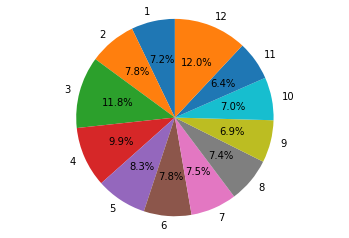

<Figure size 1440x720 with 0 Axes>

In [6]:
# get monthly distribution of reviews
def gmd(df):
    '''
        Sizes are the review-counts per month
    '''
    sizes = []
    for m in range(1,13):
        lenm = len(df.loc['2019-' + str(m)])
        sizes.append(lenm)
    return sizes
        
# a fairly even distribution of reviews every month in this dataset..
piec(gmd(rcc[APP_NAME]), range(1,13))

In [7]:
rcc[APP_NAME].head()

,Username,Rating,Review,Words,Chars,Likes,ReplyDate,Year,Month,Weekday Name
Timestamp,,,,,,,,,,
2019-12-31 23:51:49.190000+00:00,Moscow John,5,It was awesome for me using Twitter I need to ...,22,101,0,0,2019,12,Tuesday
2019-12-31 23:48:58.683000+00:00,Hoyte Bangerz,5,Easy to use lovely UI,5,21,0,0,2019,12,Tuesday
2019-12-31 23:48:02.484000+00:00,Shelby Sharp Oubre,3,Can you guys fix the problem on the app with v...,23,110,1,0,2019,12,Tuesday
2019-12-31 23:46:46.473000+00:00,Nihal Arafa,5,Learned a lot since I joined twitter,7,36,0,0,2019,12,Tuesday
2019-12-31 23:20:32.681000+00:00,Mekz Global Ltd,5,Twitter App is cool with almost everything in ...,28,151,0,0,2019,12,Tuesday


In [8]:
edf[APP_NAME].head()

,ReviewCount,Interactions,Words,Chars,Likes,Rating,Avg_Words,Avg_Chars,Avg_Likes,Avg_Rating,Neg_Interactions,Pos_Interactions
Time,,,,,,,,,,,,
2019-01-01,162,8748,2640,13866,54,643,16.30,85.59,0.33,3.97,989,3689
2019-02-01,186,8184,3414,17963,44,711,18.35,96.58,0.24,3.82,832,3752
2019-03-01,172,12212,3120,16622,71,633,18.14,96.64,0.41,3.68,1140,5824
2019-04-01,149,10579,2196,12001,71,609,14.74,80.54,0.48,4.09,990,4756
2019-05-01,234,163566,3542,18893,699,914,15.14,80.74,2.99,3.91,29835,40560


# Nota bene

The __main goal__ of this notebook is to select __40 datapoints__ from various buckets (valleys, peaks, etc) - which it does by looking at the _edf_ dataframe (Exportable Daily Sum totals Dataframe). This dataframe is formatted to suit the __TADF__ (time-series anomaly detection framework). Part of that format description is that the _DateTimeIndex_ must have H:M:S, i.e. 00:00:00 as suffix.

After 40 datapoints have been selected, we consult the __rcc2__ (clone of rcc dataframe). We retrieve all the reviews for each datapoint/date we selected from each bucket, by calling _rcc2.iloc[date]_.

<Figure size 1440x1296 with 0 Axes>

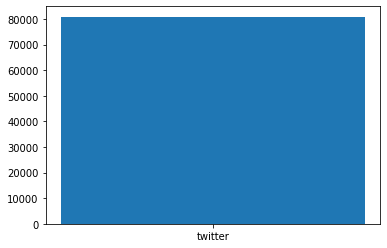

<Figure size 1440x1296 with 0 Axes>

In [9]:
sizes = []
titles = []
y_pos = np.arange(len(sizes))

for app in rcc.keys():
    titles.append(app)
    sizes.append(len(rcc[app]))

plt.bar(np.arange(len(sizes)), sizes)
plt.xticks(np.arange(len(sizes)), titles)
plt.figure(figsize=(20, 18))

<Figure size 1440x1296 with 0 Axes>

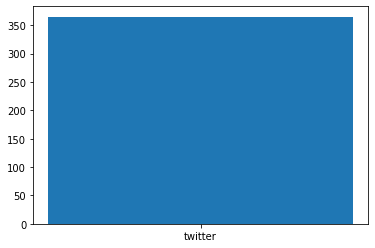

<Figure size 1440x1296 with 0 Axes>

In [10]:
sizes = []
titles = []
y_pos = np.arange(len(sizes))

for app in edf.keys():
    titles.append(app)
    sizes.append(len(edf[app]))

plt.bar(np.arange(len(sizes)), sizes)
plt.xticks(np.arange(len(sizes)), titles)
plt.figure(figsize=(20, 18))

In [11]:
# demonstrate that the daily sum totals are based on the raw
print(sum(edf[APP_NAME]['ReviewCount']),
len(rcc[APP_NAME]))

80872 80872


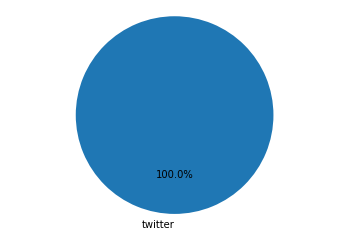

<Figure size 1440x720 with 0 Axes>

In [12]:
# distribution of reviews from raw/cleaned/classes
piec([len(rcc[APP_NAME])],
    rcc.keys())

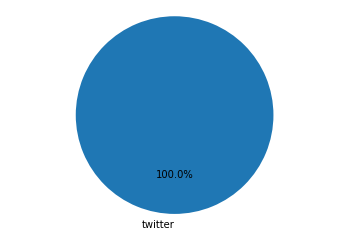

<Figure size 1440x720 with 0 Axes>

In [13]:
# distribution of reviews in exportable dataframes
piec([len(edf[APP_NAME])],
    edf.keys())

# select 40 (days) datapoints

In [14]:
def append_index2(selected, app, indices_to_select):
    """This method takes an arbitrary amount of indices
    and appends the first 10 unique values to an array.
    """
    
    if len(selected) >= 40:
        print("Not adding more indices! Already at 40!")
        return
    
    print('Start appending 10 unique values to the following array:')
    print(selected)
    
    selected_counter = 0
    duplicates = []
    
    # iterate over the provided indices
    for idx in indices_to_select:
        if selected_counter >= 10: # 10 values have been appended
            print("Reached 10 values, breaking..")
            break
        elif idx in selected: # duplicate value
            duplicates.append(idx)
            continue
        else: # unique value found
            selected.append(idx)
            selected_counter += 1
    
    if selected_counter < 10:
        print("Was not able to append 10 values due to duplicate values. These values are already selected:")
        print(duplicates)
    else:
        print(f"Successfully added 10 unique values for {app}")
        print(selected)

# #1
### 10 datapoints from time-series anomaly detection framework

In order to get the ten datapoints from the anomaly detection framework for each app, we simply load the exportable (anomaly detection framework compliant) datasets into the system, and have it output the indices of datapoints it thinks is anomalous.

This process is done manually, and the results are logged in the table below:

<table style="float: left;">
    <thead>
        <tr>
            <th>App</th>
            <th style="text-align: left;">Anomaly Indices</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Reddit</td>
            <td id="reddit_indices">[58, 59, 88, 89, 103, 104, 114, 115, 127, 128, 144, 158, 171, 213, 204, 252]</td>
        </tr>
    </tbody>
</table>

In [15]:
append_index2(selected_indices[APP_NAME], APP_NAME, TSADF_INDICES)

Start appending 10 unique values to the following array:
[]
Reached 10 values, breaking..
Successfully added 10 unique values for twitter
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019']


In [16]:
s.mean(edf[APP_NAME]['ReviewCount'])

221.56712328767122

In [17]:
len(rcc[APP_NAME])

80872

# #2

### 10 datapoints from visual _peaks_ (nope we're actually extracting automatically the largest vals)

To get these ten datapoints, we plot the data for the whole year, and simply choose ten visible peaks.

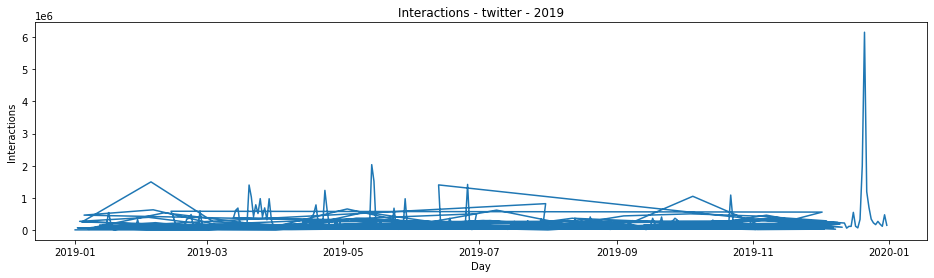

In [18]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(edf[APP_NAME][RELEVANT_COL])
ax.set(xlabel='Day', ylabel=RELEVANT_COL, title=RELEVANT_COL + ' - '+APP_NAME+' - 2019')
# plt.hlines(y=s.mean(edf[APP_NAME][RELEVANT_COL]), xmin=0, xmax=len(edf[APP_NAME]), colors='r', linestyles='--', lw=2)
plt.show()

In [19]:
print(f"Variance: {s.variance(edf[APP_NAME][RELEVANT_COL])}",
f"Standard deviation: {s.stdev(edf[APP_NAME][RELEVANT_COL])}")

Variance: 177203086118.6185 Standard deviation: 420954.96922903584


In [20]:
review_counts = edf[APP_NAME][RELEVANT_COL]
reviewcounts_nparray = np.array(review_counts)
largest_values = reviewcounts_nparray[np.argsort(reviewcounts_nparray)[-50:]]
peaks = sorted(largest_values, reverse=True) # sort descending

# find the indices via the largest values
highest_indices = []
for peak_value in peaks:
    index = edf[APP_NAME][edf[APP_NAME][RELEVANT_COL] == peak_value].index[0]
    index = str(index).split(" ")[0]
    highest_indices.append(index)
    
append_index2(selected_indices[APP_NAME], APP_NAME, highest_indices)

Start appending 10 unique values to the following array:
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019']
Reached 10 values, breaking..
Successfully added 10 unique values for twitter
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019', '2019-12-21', '2019-05-14', '2019-12-20', '2019-05-15', '2019-02-04', '2019-06-26', '2019-06-13', '2019-03-20', '2019-04-23', '2019-12-22']


# #3

### 10 datapoints from visual _valleys_

In [21]:
counts = edf[APP_NAME][RELEVANT_COL]
counts_nparray = np.array(counts)
cnpa = sorted(counts_nparray, reverse=False)
lowest_values = cnpa[:10]
higest_values = cnpa[len(cnpa)-10:]

lowest_indices = []
for low_value in lowest_values:
    index = edf[APP_NAME][edf[APP_NAME][RELEVANT_COL] == low_value].index[0]
    index = str(index).split(" ")[0]
    lowest_indices.append(index)
    
append_index2(selected_indices[APP_NAME], APP_NAME, lowest_indices)

Start appending 10 unique values to the following array:
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019', '2019-12-21', '2019-05-14', '2019-12-20', '2019-05-15', '2019-02-04', '2019-06-26', '2019-06-13', '2019-03-20', '2019-04-23', '2019-12-22']
Successfully added 10 unique values for twitter
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019', '2019-12-21', '2019-05-14', '2019-12-20', '2019-05-15', '2019-02-04', '2019-06-26', '2019-06-13', '2019-03-20', '2019-04-23', '2019-12-22', '2019-08-01', '2019-02-01', '2019-01-01', '2019-04-01', '2019-03-01', '2019-03-02', '2019-01-19', '2019-09-14', '2019-04-08', '2019-02-02']


In [22]:
lowest_values

[6846, 8184, 8748, 10579, 12212, 12738, 14212, 15200, 16686, 16815]

In [23]:
sorted(higest_values, reverse=True)

[6151574,
 2035692,
 1997406,
 1523275,
 1499987,
 1421115,
 1405811,
 1402218,
 1235877,
 1194536]

In [24]:
peaks[:10] == sorted(higest_values, reverse=True)

True

# #4

### 10 random datapoints

Here we do a random sample (with varying seed), and make sure to only select indices that have not been selected by previous steps.

np.random.random_sample(10)

In [25]:
random_sel = random.sample(list(edf[APP_NAME].index), 30)
random_sel = [str(rs).split(" ")[0] for rs in random_sel]
append_index2(selected_indices[APP_NAME], APP_NAME, random_sel)

Start appending 10 unique values to the following array:
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019', '2019-12-21', '2019-05-14', '2019-12-20', '2019-05-15', '2019-02-04', '2019-06-26', '2019-06-13', '2019-03-20', '2019-04-23', '2019-12-22', '2019-08-01', '2019-02-01', '2019-01-01', '2019-04-01', '2019-03-01', '2019-03-02', '2019-01-19', '2019-09-14', '2019-04-08', '2019-02-02']
Reached 10 values, breaking..
Successfully added 10 unique values for twitter
['12-02-2019', '17-03-2019', '20-03-2019', '22-03-2019', '23-03-2019', '24-03-2019', '25-03-2019', '26-03-2019', '27-03-2019', '28-03-2019', '2019-12-21', '2019-05-14', '2019-12-20', '2019-05-15', '2019-02-04', '2019-06-26', '2019-06-13', '2019-03-20', '2019-04-23', '2019-12-22', '2019-08-01', '2019-02-01', '2019-01-01', '2019-04-01', '2019-03-01', '2019-03-02', '2019-01-19', '2019-09-14', '2019-04-08', '2019-02-02', '2019-06-07', '2019-11-

In [26]:
len(selected_indices[APP_NAME])

40

# from INDICES to DATES

In [27]:
# import re
# dates = []

# for i in selected_indices[APP_NAME]:
#     date = edf[APP_NAME][edf[APP_NAME].index == i]
    
#     cl = re.sub(" 00:00", "", date.item()) # remove trailing 00:00
#     sp = cl.split(".")
#     cl = sp[1] + "-" + sp[0] + "-" + sp[2] # change order to MONTH / DAY / YEAR
#     dates.append(cl)

dates = selected_indices[APP_NAME]

# selecting 100 reviews per datapoint from the (above) four buckets

At this point, we have selected 10 unique datapoints (days, dates) from the following four buckets:
- tsadf
- peaks
- valleys
- random

We've made sure the selected data points are unique.

The next step is to iterate through all (in total) 40 datapoints, and from each date, select (at least) 100 reviews. In the end, we should be left with a maximum of 4000 reviews from each app.

(Remark 1) Each app has several tens of thousands of reviews, however we cannot always be sure that each selected datapoint (date) has 100 reviews. For datasets with less than 100K reviews, this may often be the case.

We iterate through each date, and then perform a stratified sample of 100 reviews based on the rating (1-5), so that the selected 100 reviews are representative of all the reviews that were written on that date.

(Remark 2) To perform the stratified sample, we make use of ScikitLearn 'SplitTrainTest' method, which accepts a percentage that indicates how large the _test_ set should be. As we want _exactly_ 100 reviews, we have to calculate how much 100 reviews is in percent, with respect to the reviews in the given datapoint.

Finding the percentage 100 is of AMOUNT_OF_REVIEWS = (100 / REVIEW_COUNT) * 100 

Considering Remark 1, we do this wherever possible. If it is not possible, we simply take the reviews that are there.

<AxesSubplot:>

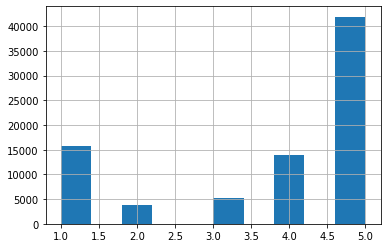

In [28]:
# distribution of rating across ENTIRE dataset
rcc[APP_NAME]['Rating'].hist()

In [29]:
rcc[APP_NAME]['Rating'].value_counts() / len(rcc[APP_NAME])

5    0.518152
1    0.195840
4    0.172631
3    0.065659
2    0.047717
Name: Rating, dtype: float64

<AxesSubplot:>

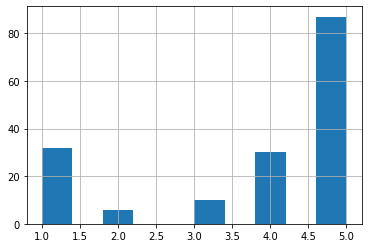

In [30]:
# distribution of rating on a given date
rcc[APP_NAME]['Rating'].loc[dates[-1]].hist()

In [31]:
# rating ratio on a given date
rcc[APP_NAME]['Rating'].loc[dates[1]].value_counts() / len(rcc[APP_NAME].loc[dates[1]])

5    0.412121
1    0.281818
4    0.127273
3    0.090909
2    0.087879
Name: Rating, dtype: float64

# final touches

The dataframe 'rcc' (cleaned reviews) is the one we pipe into an Excel sheet.

However, we only need a few columns, also, ReplyDate is a boolean field.

In [32]:
rcc[APP_NAME].head(1)

,Username,Rating,Review,Words,Chars,Likes,ReplyDate,Year,Month,Weekday Name
Timestamp,,,,,,,,,,
2019-12-31 23:51:49.190000+00:00,Moscow John,5,It was awesome for me using Twitter I need to ...,22,101,0,0,2019,12,Tuesday


In [33]:
rcc2 = rcc.copy()

rcc2[APP_NAME] = rcc2[APP_NAME].drop(['Username', 'Words', 'Chars', 'Year', 'Month', 'Weekday Name'], axis=1)
rcc2[APP_NAME].head(1)

,Rating,Review,Likes,ReplyDate
Timestamp,,,,
2019-12-31 23:51:49.190000+00:00,5,It was awesome for me using Twitter I need to ...,0,0


In [34]:
rcc2[APP_NAME] = rcc2[APP_NAME].rename(columns = {
    "ReplyDate": "Reply?"
}, errors="raise")
rcc2[APP_NAME].head(1)

,Rating,Review,Likes,Reply?
Timestamp,,,,
2019-12-31 23:51:49.190000+00:00,5,It was awesome for me using Twitter I need to ...,0,0


In [35]:
# make new dataframe to hold our samples from each date
selected_reviews = pd.DataFrame(columns=rcc2[APP_NAME].columns)
selected_reviews.head()

,Rating,Review,Likes,Reply?


In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

def get_strat_sample(app, date, column='Rating'):
    """Returns a Stratified sample.
    
    Keyword arguments:
    app - name in the 'rcc' dataframe that holds a dataframe
    date - a date, present in the dataframe
    column - name of column, present in dataframe, to stratify on
    """
    reviews = rcc2[app].loc[date]
    ratings = reviews[column]
    
    one_pct = len(reviews) / 100
    pct_100 = round((100 / one_pct)/100, 2)
    
    print(f'On date {date}, a 100 reviews out of {len(reviews)} in % is {pct_100}')
    
    try:
        sss = StratifiedShuffleSplit(n_splits=1, test_size=pct_100, random_state=0)
        for train_index, test_index in sss.split(reviews, ratings):
            X_train, X_test = reviews.iloc[train_index], reviews.iloc[test_index]
            y_train, y_test = ratings.iloc[train_index], ratings.iloc[test_index]
        return X_test
    except ValueError:
        print("Insufficient class labels in one of your classes to keep the data split ratio equal to test_size.")
        return reviews.sample(100)
    
test = get_strat_sample(APP_NAME, '2019-03-01')

On date 2019-03-01, a 100 reviews out of 265 in % is 0.38


In [37]:
test['Rating'].value_counts() / len(test)

5    0.603960
4    0.188119
1    0.128713
3    0.039604
2    0.039604
Name: Rating, dtype: float64

In [38]:
rcc[APP_NAME]['Rating'].loc['2019-03-01'].value_counts() / len(rcc[APP_NAME].loc['2019-03-01'])

5    0.603774
4    0.188679
1    0.124528
3    0.045283
2    0.037736
Name: Rating, dtype: float64

In [39]:
len(test)

101

It is demonstrated in the two above cells that the ratio of the rating in the (stratified, "test set") sample is close to identical with that found in the whole collection of reviews on the date from which reviews were sampled.

In [40]:
lt_100_counter = 0
for date in dates:
    data = rcc2[APP_NAME].loc[date]
    if len(data) < 110: # technically there only has to be 100 reviews present, but it turns out
                        # the SplitStratified (scikit.learn) needs a little wiggleroom (~10 reviews)
        print(f'For date: {date} found LT 100 reviews ({len(data)}). Selecting all')
        lt_100_counter += 1
        sample = data
    else:
        print(f'For date: {date} found GT 100 reviews ({len(data)}). Performing strat sample')
        sample = get_strat_sample(APP_NAME, date, 'Rating')
        
    for idx, row in sample.iterrows():
        selected_reviews.loc[idx] = row
        
if lt_100_counter != 0:
    print(f"{lt_100_counter}/40 days did not have 100 reviews")
else:
    print("All days had at least 100 reviews")
print(f"{len(selected_reviews)} reviews selected from {len(dates)} unique dates")

For date: 12-02-2019 found GT 100 reviews (168). Performing strat sample
On date 12-02-2019, a 100 reviews out of 168 in % is 0.6
For date: 17-03-2019 found GT 100 reviews (330). Performing strat sample
On date 17-03-2019, a 100 reviews out of 330 in % is 0.3
For date: 20-03-2019 found GT 100 reviews (414). Performing strat sample
On date 20-03-2019, a 100 reviews out of 414 in % is 0.24
For date: 22-03-2019 found GT 100 reviews (450). Performing strat sample
On date 22-03-2019, a 100 reviews out of 450 in % is 0.22
For date: 23-03-2019 found GT 100 reviews (466). Performing strat sample
On date 23-03-2019, a 100 reviews out of 466 in % is 0.21
For date: 24-03-2019 found GT 100 reviews (431). Performing strat sample
On date 24-03-2019, a 100 reviews out of 431 in % is 0.23
For date: 25-03-2019 found GT 100 reviews (402). Performing strat sample
On date 25-03-2019, a 100 reviews out of 402 in % is 0.25
For date: 26-03-2019 found GT 100 reviews (331). Performing strat sample
On date 26-0

In [41]:
selected_reviews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3920 entries, 2019-12-02 16:41:05.114000+00:00 to 2019-11-06 13:04:01.654000+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  3920 non-null   object
 1   Review  3920 non-null   object
 2   Likes   3920 non-null   object
 3   Reply?  3920 non-null   object
dtypes: object(4)
memory usage: 153.1+ KB


In [42]:
selected_reviews['Review'][selected_reviews['Reply?'] == 1]

2019-05-14 18:32:18.460000+00:00    (may 13 update also failed to fix this) gyys p...
2019-05-15 16:36:10.314000+00:00    give my account back, your system is blowing m...
2019-05-15 02:46:45.250000+00:00    Edit: i did update, and so far so good ! happy...
Name: Review, dtype: object

# dump everything into a .csv

In [43]:
selected_reviews.head(1)

,Rating,Review,Likes,Reply?
2019-12-02 16:41:05.114000+00:00,5,Great for news and random banter,0,0


In [44]:
csv_filename = APP_NAME + "_samples.csv"
selected_reviews.to_csv(csv_filename, index=True)

# build xlsx

In [45]:
m_d_y_dates = dates
y_m_d_dates = []
for date in m_d_y_dates:
    arr = date.split("-")
    m = arr[0]
    d = arr[1]
    y = arr[2]
    ymd = y + '-' + m + '-' + d
    y_m_d_dates.append(ymd)
    print(f"MM-DD-YYYY: {date}, YYYY-DD-MM: {ymd}")
    
def get_ymd_date(date):
    arr = date.split("-")
    m = arr[0]
    d = arr[1]
    y = arr[2]
    ymd = y + '-' + m + '-' + d
    return ymd

MM-DD-YYYY: 12-02-2019, YYYY-DD-MM: 2019-12-02
MM-DD-YYYY: 17-03-2019, YYYY-DD-MM: 2019-17-03
MM-DD-YYYY: 20-03-2019, YYYY-DD-MM: 2019-20-03
MM-DD-YYYY: 22-03-2019, YYYY-DD-MM: 2019-22-03
MM-DD-YYYY: 23-03-2019, YYYY-DD-MM: 2019-23-03
MM-DD-YYYY: 24-03-2019, YYYY-DD-MM: 2019-24-03
MM-DD-YYYY: 25-03-2019, YYYY-DD-MM: 2019-25-03
MM-DD-YYYY: 26-03-2019, YYYY-DD-MM: 2019-26-03
MM-DD-YYYY: 27-03-2019, YYYY-DD-MM: 2019-27-03
MM-DD-YYYY: 28-03-2019, YYYY-DD-MM: 2019-28-03
MM-DD-YYYY: 2019-12-21, YYYY-DD-MM: 21-2019-12
MM-DD-YYYY: 2019-05-14, YYYY-DD-MM: 14-2019-05
MM-DD-YYYY: 2019-12-20, YYYY-DD-MM: 20-2019-12
MM-DD-YYYY: 2019-05-15, YYYY-DD-MM: 15-2019-05
MM-DD-YYYY: 2019-02-04, YYYY-DD-MM: 04-2019-02
MM-DD-YYYY: 2019-06-26, YYYY-DD-MM: 26-2019-06
MM-DD-YYYY: 2019-06-13, YYYY-DD-MM: 13-2019-06
MM-DD-YYYY: 2019-03-20, YYYY-DD-MM: 20-2019-03
MM-DD-YYYY: 2019-04-23, YYYY-DD-MM: 23-2019-04
MM-DD-YYYY: 2019-12-22, YYYY-DD-MM: 22-2019-12
MM-DD-YYYY: 2019-08-01, YYYY-DD-MM: 01-2019-08
MM-DD-YYYY: 2

In [46]:
for d in y_m_d_dates:
    print(d)

2019-12-02
2019-17-03
2019-20-03
2019-22-03
2019-23-03
2019-24-03
2019-25-03
2019-26-03
2019-27-03
2019-28-03
21-2019-12
14-2019-05
20-2019-12
15-2019-05
04-2019-02
26-2019-06
13-2019-06
20-2019-03
23-2019-04
22-2019-12
01-2019-08
01-2019-02
01-2019-01
01-2019-04
01-2019-03
02-2019-03
19-2019-01
14-2019-09
08-2019-04
02-2019-02
07-2019-06
15-2019-11
20-2019-04
26-2019-07
13-2019-07
23-2019-07
14-2019-06
13-2019-09
13-2019-08
06-2019-11


In [47]:
selected_indices

{'twitter': ['12-02-2019',
  '17-03-2019',
  '20-03-2019',
  '22-03-2019',
  '23-03-2019',
  '24-03-2019',
  '25-03-2019',
  '26-03-2019',
  '27-03-2019',
  '28-03-2019',
  '2019-12-21',
  '2019-05-14',
  '2019-12-20',
  '2019-05-15',
  '2019-02-04',
  '2019-06-26',
  '2019-06-13',
  '2019-03-20',
  '2019-04-23',
  '2019-12-22',
  '2019-08-01',
  '2019-02-01',
  '2019-01-01',
  '2019-04-01',
  '2019-03-01',
  '2019-03-02',
  '2019-01-19',
  '2019-09-14',
  '2019-04-08',
  '2019-02-02',
  '2019-06-07',
  '2019-11-15',
  '2019-04-20',
  '2019-07-26',
  '2019-07-13',
  '2019-07-23',
  '2019-06-14',
  '2019-09-13',
  '2019-08-13',
  '2019-11-06']}

# Add 10 most upvoted for the day to top of the sheet

What we've done so far is we've selected 40 dates, and then sample 100 reviews from each of those dates in a stratified fashion (based on the rating column).

In addition to that, we want the 10 most upvoted reviews for each of those dates, at the top of the each sheet we create in the final Excel book.

In [48]:
def get_indices_via_likes(date, dataframe, likes_list):
    """
        Takes a list of upvotes/likes (int), and searches through the entire dataframe
        to a review with this exact number of upvotes.
        
        When it finds it, it takes its index, and adds it to a list. In the end, all the
        indices of the reviews which had the same number of upvotes that were provided to
        this method are returned.
    """
    indices = []
    for likes_no in likes_list:
        for idx, row in rcc[APP_NAME].loc[date].iterrows():
            if row.Likes == likes_no:
                indices.append(idx)

    return indices

def get_most_upvoted(date, dataframe, amount):
    """
        Given a date, dataframe, and amount, this method finds the n highest values
        in the column 'Likes' of the dataframe.
    """
    all_upvotes = np.array(dataframe.loc[date].Likes)
    largest = all_upvotes[np.argsort(all_upvotes)[-amount:]]
    return largest

def index_is_duplicate(idx, already_selected_idx):
    return idx in already_selected_idx

In [49]:
rcc2[APP_NAME].head(1)

,Rating,Review,Likes,Reply?
Timestamp,,,,
2019-12-31 23:51:49.190000+00:00,5,It was awesome for me using Twitter I need to ...,0,0


# Make overview sheet

In [68]:
"""
    At the overview page we display some additional data in columns.
    For each date (out of 40): source, date, total reviews, count negative, % negative..
"""

# print("SOURCE", "DATE", "TOT", "NEG", "NEG PRCNT")

sources = 10*['TSADF'] + 10*['PEAKS'] + 10*['VALLEYS'] + 10*['RANDOM']
dates = dates
totals = []

# Reviews
count_negative = []
count_positive = []
percent_negative = []

# Upvotes
count_upvotes = []
positive_upvotes = []
negative_upvotes = []
percent_upvote_negative = []
average_upvote_negative = []
median_upvote_negative = []

average_upvote_positive = []
median_upvote_positive = []

interactions = []
nega_interactions = []
posa_interactions = []
percent_neg_interactions = []

co = 0
for d in dates:
    # For each date, calculate sum totals, percentages, median, etc..
    reviews = rcc2[APP_NAME].loc[d]

    # 1. Total review count on date
    total = len(reviews)
    totals.append(total)

    # 2. Count Negative (<= 3)
    negative_reviews = reviews[reviews.Rating <= 3]
    positive_reviews = reviews[reviews.Rating > 3]
    neg_count = len(negative_reviews)
    pos_count = len(positive_reviews)
    count_negative.append(neg_count)
    count_positive.append(pos_count)

    # 3. Percentage of negative reviews
    neg_r = neg_count / (total/100)
    percent_negative.append(round((neg_r/100), 2))
    
    # 4. Total amount of upvotes on this date
    negative_up = sum(reviews[reviews.Rating <= 3].Likes)
    positive_up = sum(reviews[reviews.Rating > 3].Likes)
    all_upvotes = sum(reviews.Likes)
    count_upvotes.append(all_upvotes)
    negative_upvotes.append(negative_up)
    positive_upvotes.append(positive_up)
    
    # 5. Percentage of upvotes for negative reviews
    upv_neg_pcnt = negative_up / (all_upvotes/100)
    percent_upvote_negative.append(round((upv_neg_pcnt/100),2))
    
    # 6. Average upvotes for negative reviews
    avg_num = s.mean(negative_reviews.Likes)
    average_upvote_negative.append(round(avg_num, 1))
    
    # 7. Median upvotes for negative reviews
    med_num = s.median(negative_reviews.Likes)
    median_upvote_negative.append(med_num)

    # 8. Average upvotes for positive reviews
    avg_pos_num = s.mean(positive_reviews.Likes)
    average_upvote_positive.append(round(avg_pos_num, 1))

    # 9. Median upvotes for positive reviews
    med_pos_num = s.median(positive_reviews.Likes)
    median_upvote_positive.append(round(med_pos_num, 1))

    # 10. Interactions
    all_interactions = int(edf[APP_NAME].loc[d].Interactions)
    interactions.append(all_interactions)
    neg_interactions = int(edf[APP_NAME].loc[d].Neg_Interactions)
    nega_interactions.append(neg_interactions)
    pos_interactions = int(edf[APP_NAME].loc[d].Pos_Interactions)
    posa_interactions.append(pos_interactions)
    percent_negative_interactions = neg_interactions / (all_interactions / 100)
    percent_neg_interactions.append(round(percent_negative_interactions/100, 2))
    
    co += 1
    
my_dict = {
    'Source' : sources,
    'Date' : dates,
    'Interactions' : interactions,
    'I% <= 3' : percent_neg_interactions,
    'I <= 3' : neg_interactions,
    'I > 3' : pos_interactions,
    'Reviews' : totals,
    'Rev% <= 3' : percent_negative,
    '<= 3' : count_negative,
    '> 3' : count_positive,
    'Upvotes' : count_upvotes,
    '<= 3' : negative_upvotes,
    '> 3' : positive_upvotes,
    'Up% <= 3' : percent_upvote_negative,
    'Avg <= 3' : average_upvote_negative,
    'Avg > 3' : average_upvote_positive,
    'Med <= 3' : median_upvote_negative,
    'Med > 3' : median_upvote_positive
}

MY_OVERVIEW = pd.DataFrame(my_dict)

MY_OVERVIEW.head(1)
# len(percent_upvote_negative)

,Source,Date,Interactions,I% <= 3,I <= 3,I > 3,Reviews,Rev% <= 3,<= 3,> 3,Upvotes,Up% <= 3,Avg <= 3,Avg > 3,Med <= 3,Med > 3
0,TSADF,12-02-2019,560790,0.32,3564,20060,168,0.24,297,159,456,0.65,7.2,1.3,0.0,0.0


In [65]:
int(edf[APP_NAME].loc['2019-08-08'].Interactions)

65391

In [51]:
selected_reviews.tail(2)

,Rating,Review,Likes,Reply?
2019-11-06 15:10:28.978000+00:00,5,"I am not a regular user of this app as of now,...",4,0
2019-11-06 13:04:01.654000+00:00,3,Best among other social apps,0,0


# Export to Excel Book

- Get 10 most upvoted reviews at the top (descending)
- Sort the rest by rating (ascending)
- Remove duplicates

In [71]:
WRITE = True

if WRITE:
    sel = selected_reviews.copy()
    sel.index = sel.index.tz_localize(None) # apply fix

    import xlsxwriter
    FILENAME = APP_NAME + "_spreadsheet.xlsx" # Set the name of the .xlsx file..
    writer = pd.ExcelWriter(FILENAME, engine='xlsxwriter') # Create the file...

    # 0. Make overview sheet in the book
    MY_OVERVIEW.to_excel(writer, sheet_name='OVERVIEW')

    counter = 1
    for date in dates:
        # 1. Collect 10 most upvoted reviews on that date
        top_upvoted = get_most_upvoted(date, rcc2[APP_NAME], 10)

        # 2. Collect indices of those reviews
        top_upvoted_idx = get_indices_via_likes(date, rcc2[APP_NAME], top_upvoted)

        # 3. Collect the actual reviews
        ten_most_upvoted_reviews = rcc2[APP_NAME].loc[top_upvoted_idx]
        ten_most_upvoted_reviews.index = ten_most_upvoted_reviews.index.tz_localize(None)

        # 4. Concatenate these with the selected reviews of the same date
        sheet_of_reviews = pd.concat([ten_most_upvoted_reviews, sel.loc[date]])
        
        # O. Remove duplicates
        sheet_of_reviews = sheet_of_reviews.drop_duplicates(subset=None, keep='first', inplace=False)
        
        # 5. Sort reviews by rating
        sheet_of_reviews = sheet_of_reviews.sort_values('Rating', ascending=True)
        # 6. Sort each rating category by likes
        rat_1 = sheet_of_reviews[sheet_of_reviews.Rating == 1].sort_values('Likes', ascending=False)
        rat_2 = sheet_of_reviews[sheet_of_reviews.Rating == 2].sort_values('Likes', ascending=False)
        rat_3 = sheet_of_reviews[sheet_of_reviews.Rating == 3].sort_values('Likes', ascending=False)
        rat_4 = sheet_of_reviews[sheet_of_reviews.Rating == 4].sort_values('Likes', ascending=False)
        rat_5 = sheet_of_reviews[sheet_of_reviews.Rating == 5].sort_values('Likes', ascending=False)
        sheet_of_reviews = pd.concat([rat_1, rat_2, rat_3, rat_4, rat_5])
        
        # X. Get daily overview sheet row
        overview_row = MY_OVERVIEW[MY_OVERVIEW.Date == date]
        sheet_of_reviews = pd.concat([overview_row, sheet_of_reviews], axis=1, sort=False)

        # 5a. Sort the sheet with highest upvotes first
#         sheet_of_reviews = sheet_of_reviews.sort_values('Likes', ascending=False)
        # 5b. Then sort the other reviews by rating, lowest first.
#         sheet_of_reviews = pd.concat([sheet_of_reviews[0:10], sheet_of_reviews[10:].sort_values('Rating', ascending=True)])

        # 5. Create a sheet in the book for this date
        sheet_of_reviews.to_excel(writer, sheet_name=('Day ' + str(counter) + ' (' + get_ymd_date(date) + ')')) 

        counter += 1

    writer.save()
else:
    print("Not writing...")